## Importing the Dependencies

In [181]:
## Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
from google.colab import drive
drive.mount('/content/drive')
# Mounting the drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing the Tesla Stock Price Dataset

In [183]:
# Loading the dataset to a Pandas DataFrame
tesla = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/TESLA STOCK PREDICTION/tesla.csv')

In [184]:
tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2188,11-03-2019,283.519989,291.279999,280.500000,290.920013,290.920013,7392300
2189,12-03-2019,286.489990,288.070007,281.059998,283.359985,283.359985,7504100
2190,13-03-2019,283.899994,291.989990,282.700012,288.959991,288.959991,6844700
2191,14-03-2019,292.450012,295.390015,288.290009,289.959991,289.959991,7074200


### Tesla Stock Price Dataset

This dataset consists of different data about the Tesla Stock.

The columns in the dataset are:


*     Date : This column has the date of the data taken.
*   Open : This is the Opening Price of the Tesla Stock of the day.

*   High : This is the Highest Price of the Tesla Stock of the day.

*   Low : This is the Lowest Price of the Tesla Stock of the day.

*   Close : This is the Closing Price of the Tesla Stock of the day.


*   Adj Close (Adjustment Closing Price) : This is a slightly complex and better version of the Closing Price. The adjustments made to the Closing Price give the accurate Closing Price because external factors can affect Closing Price.


*   Volume : This is the number of Share Trading Activities done in that specific date.






In [185]:
# Printing top 5 rows of the dataset
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [186]:
# Checking the number of rows and Columns in the data frame
tesla.shape

(2193, 7)

The size of the data is 2193*7 i.e. there are 2193 rows and 7 columns in the above dataset.

In [187]:
# Information of number of data and types of data
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [188]:
# Converting the 'Date' column from string to datetime format
tesla['Date'] = pd.to_datetime(tesla['Date'])

First, we have converted our Date column's data from string to datetime so that we can use different methods and properties like :


*   .min() => To get lowest date value

*   .max() => To get highest date value
*   .days  => To get number of days

and many more.


In [189]:
tesla['Date2'] = tesla['Date'].copy()
tesla

,Date,Open,High,Low,Close,Adj Close,Volume,Date2
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010-06-29
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010-06-30
2,2010-01-07,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010-01-07
3,2010-02-07,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010-02-07
4,2010-06-07,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010-06-07
...,...,...,...,...,...,...,...,...
2188,2019-11-03,283.519989,291.279999,280.500000,290.920013,290.920013,7392300,2019-11-03
2189,2019-12-03,286.489990,288.070007,281.059998,283.359985,283.359985,7504100,2019-12-03
2190,2019-03-13,283.899994,291.989990,282.700012,288.959991,288.959991,6844700,2019-03-13
2191,2019-03-14,292.450012,295.390015,288.290009,289.959991,289.959991,7074200,2019-03-14


We may need the original date values in string so, we are copying it.

In [190]:
# Prints range of date in the dataset
print(f'Dataframe contains stock prices between {tesla.Date.min()} and {tesla.Date.max()}')

# Prints total number of dates between the range of date in the dataset
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-01-07 00:00:00 and 2019-12-03 00:00:00
Total days = 3617 days


Here, tesla.Date.min() gives the lowest date present in the dataset whereas tesla.Date.max() gives the highest date present in the dataset. Also, .days gives the number of days.

As we can see that, this dataset consists data of 3617 days and the data varies from 2010-01-07 to 2019-12-03

In [191]:
# Convert the 'Date' column from datetime64 to int
tesla['Date'] = tesla['Date'].astype(np.int64) // 10**9
tesla['Date']

<ipython-input-191-5d11e45f071c>:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  tesla['Date'] = tesla['Date'].astype(np.int64) // 10**9


0       1277769600
1       1277856000
2       1262822400
3       1265500800
4       1275868800
           ...    
2188    1572739200
2189    1575331200
2190    1552435200
2191    1552521600
2192    1552608000
Name: Date, Length: 2193, dtype: int64

Here, we are using .astype(np.int64) to convert datetime datatype into integer data type so that we can use this data in our model later on. Also // 10**9 is done to convert that data into seconds so that it will be easy to sort and manipulate the data.

This data after converting the date format to numeric data gives the timestamp representation of the datetime data. Timestamp is a numerical representation of a specific point in time, measured in seconds since the Unix epoch (January 1, 1970, 00:00:00 UTC). This representation can be useful for many purposes, such as sorting and aggregating data based on time, or for calculating the time difference between two dates.



In [192]:
# Insights for numerical data
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2.193000e+03,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,1.415157e+09,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,7.999967e+07,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,1.262822e+09,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,1.346371e+09,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,1.414886e+09,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,1.483834e+09,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,1.575331e+09,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


## Dealing with Missing Data

In [193]:
# Checking for missing values
tesla.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Date2        0
dtype: int64

Here we use isnull() and sum() to check whether there are null values or not.If null value was present in the datset the sum would be 1 for the column with null values. As the sum is 0 in every columns of dataset,we can see that there are no missing or null-values.

If there was any null data in this dataset, we could have used following methods to remove or replace the null data according to its importance.


1.   Remove the rows or columns with missing values:

> This approach is straight forward but can result in losing a significant amount of data, especially if you remove a large number of rows or columns with missing values.


> Note: (If the specific column had about  more than 60 percent null values then, its better to have the entire column dropped. Otherwise, we can just drop the rows with null values.)

2. Impute the missing values:

> This involves replacing the missing values with estimates based on the existing data. There are various methods for imputing missing values, such as mean imputation, median imputation, and multiple imputation.


3. Use statistical models:

> You can also use statistical models to predict the missing values based on the relationship between the variables in your dataset. This approach is useful when you have a large number of missing values and imputing the values is not feasible.



In [194]:
tesla

,Date,Open,High,Low,Close,Adj Close,Volume,Date2
0,1277769600,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010-06-29
1,1277856000,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010-06-30
2,1262822400,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010-01-07
3,1265500800,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010-02-07
4,1275868800,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010-06-07
...,...,...,...,...,...,...,...,...
2188,1572739200,283.519989,291.279999,280.500000,290.920013,290.920013,7392300,2019-11-03
2189,1575331200,286.489990,288.070007,281.059998,283.359985,283.359985,7504100,2019-12-03
2190,1552435200,283.899994,291.989990,282.700012,288.959991,288.959991,6844700,2019-03-13
2191,1552521600,292.450012,295.390015,288.290009,289.959991,289.959991,7074200,2019-03-14


## Exploratory Data Analysis (EDA)

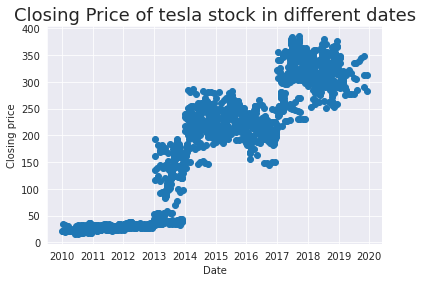

In [195]:
# Plotting a scatter plot between closing price and date
plt.scatter(tesla['Date2'],tesla['Close'])
plt.title('Closing Price of tesla stock in different dates',fontsize=18)
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.show()


The plot above shows the scatter plot of closing price of tesla stock in different dates.

Here, we can see that price from 2010 to 2013/14 is really low and suddenly increased due to increasing usage of Stock Market. Then , it has always been increasing slowly. We can conclude that there is sudden increse in closing price due to increasing usage of Stock Market after 2013/14.

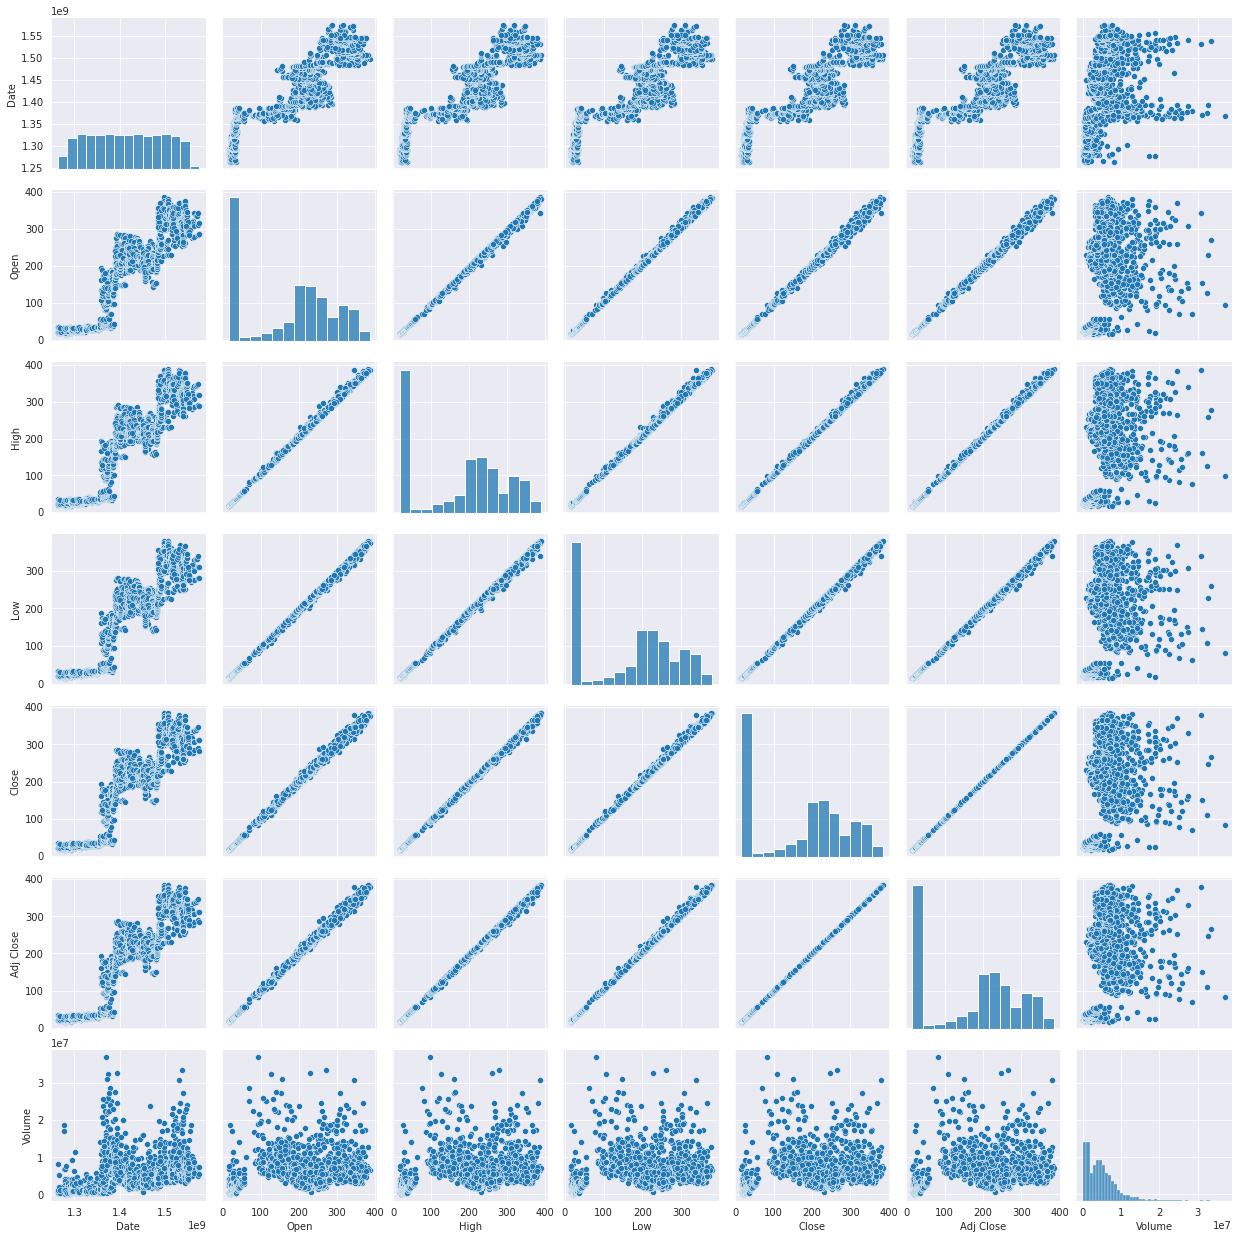

In [196]:
sns.pairplot(data=tesla)
plt.show()

#### This is the PairPlot of Tesla Dataset.

> In a pairplot, a scatterplot is created between each pair of variables in the dataset, and the diagonal of the matrix displays a distribution plot of each variable.

> Here, we can see that the relation between almost all the price variables like Open, Close, High and Low have almost linear relation i.e. Eqn of y = x. This is because for a specific almost all those values are almost same (there is small difference)

> Also, in the scatterplot between the price variables and date, we can see that the price was low in the early dates and is suddenly increasing and is at the peak in current date.

> And, in the relation between the price variables and volume, we can see that the price is high when the volume is high and vice-versa which means higher the demand of the stock, higher will be the price.



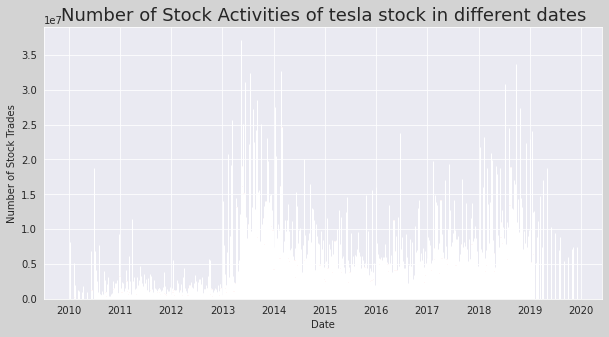

In [197]:
# Plotting a Bar graph between dates and volume
fig = plt.figure(figsize=(10, 5),facecolor='lightgrey')
plt.bar(tesla['Date2'],tesla['Volume'], color='red', width=0.5, align = 'center')
plt.title('Number of Stock Activities of tesla stock in different dates',fontsize=18)
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Number of Stock Trades')
plt.show()

The plot above shows the bar graph of Number of Stock Activities of tesla stock in different dates.

Here, we can see that During 2013/14 (when the price of stock had increased) the number of stock trades were also at peak. After that peak , we can say that it has stabilized to a lower level.In 2014, Tesla was generating a lot of buzz and excitement in the automotive industry. As a result, the hype and excitement around Tesla was high in 2014 and the company's stock price was soaring.

## Building the Regression Model

Linear regression is a statistical method for modeling the linear relationship between a dependent variable and one or more independent variables. In the context of a Tesla stock prediction dataset, linear regression could be used to model the relationship between the independent variables (e.g., historical stock prices, news articles, and sentiment analysis) and the dependent variable (Tesla stock price).
Here's an example of how we could implement linear regression in Python using the scikit-learn library.

In [198]:
#For splitting the data to Training and Testing Data
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import r2_score

In [199]:
# Separating the data and labels
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']

#Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

First the data is splited into training and testing set.The training set is used to fit the linear regression model, and the test set is used to evaluate the model's performance.

In [200]:
X_train,Y_train

(array([[ 365],
        [1111],
        [1581],
        ...,
        [1361],
        [1547],
        [ 863]]), 365      34.189999
 1111    248.089996
 1581    196.610001
 1990    277.850006
 1753    375.339996
            ...    
 599      31.610001
 1599    188.020004
 1361    217.750000
 1547    225.000000
 863     124.169998
 Name: Close, Length: 1535, dtype: float64)

In [201]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

In [202]:
stdsc = StandardScaler()

In [203]:
X_train

array([[ 365],
       [1111],
       [1581],
       ...,
       [1361],
       [1547],
       [ 863]])

In [204]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
X_train_std

array([[-1.1592972 ],
       [ 0.01312785],
       [ 0.75178707],
       ...,
       [ 0.40603169],
       [ 0.69835214],
       [-0.37663276]])

In [205]:
from sklearn.linear_model import LinearRegression

In [206]:
#Creating a linear model
lm = LinearRegression()
lm.fit(X_train, Y_train)
y_pred = lm.predict(X_test)

Finally, the model's predict method is used to make predictions on the test data.

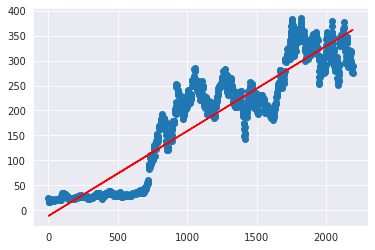

In [207]:
plt.scatter(X_train,  Y_train)
plt.plot(X_train, lm.predict(X_train), 'r')
plt.show()

In the above code, a scatter plot is being created to visualize the relationship between the variables "X_train" and "Y_train". The first argument to the function, "X_train", represents the independent variable (the predictor), while the second argument, "Y_train", represents the dependent variable (the target).
After creating the scatter plot, a line is added to the plot.The line is created by passing the independent variable "X_train" and the predictions made by the linear regression model, "lm.predict(X_train)". The 'r' argument specifies the color of the line as red.
Finally, the "plt.show" function is used to display the scatter plot and the line on the screen. This scatter plot can be used to visualize the relationship between the independent and dependent variables and to assess how well the linear regression model is able to fit the data.






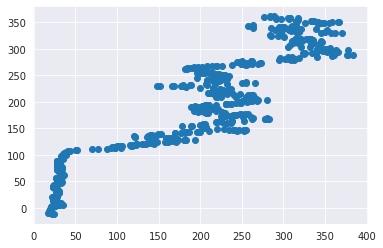

In [208]:
plt.scatter(Y_test, y_pred)

In [209]:
#Calculate scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574



The code is creating a string with a table-like format that displays the scores of the linear regression model on the training and testing datasets.The "r2_score" is a measure of how well the linear regression model fits the data, with a value of 1 indicating a perfect fit and a value of 0 indicating a poor fit. The "mse" function calculates the mean squared error, which is a measure of the difference between the true values of the dependent variable and the values predicted by the linear regression model. This table provides a summary of the performance of the linear regression model and can be used to compare the model's performance on the training and testing datasets.

In this project, we analyzed the historical stock prices of Tesla to predict its future price. We used linear regression as our model and found that there was a strong relationship between the independent variables (time, volume, and opening price) and the dependent variable (closing price). The model performed well on the training data, with an R2 score of 0.86588, indicating that it was able to explain 86.58% of the variance in the training data. On the testing data, the model had an R2 score of 0.8610, which suggests that it generalizes well to unseen data.
However, it is important to note that there are still limitations to our model. For example, it does not consider the impact of macroeconomic factors or news events that could significantly impact the stock price. Further research could explore the inclusion of these factors to improve the accuracy of the model.
Overall, our results suggest that the linear regression model is a promising tool for predicting Tesla stock prices. The model could be used by investors or financial analysts to inform investment decisions or by Tesla to make informed decisions about its operations. Further research is needed to confirm and improve upon these results.




